#1 Monte Carlo estimation of Shapley value (25%)



Consider n agents (A,B,C . . .N) boarding a (sufficiently large) taxi at location 0 on the real
line. They share the taxi to return home. Agent A lives at distance 1, B at distance 2, etc. In
general, for agent ai the distance to home equals i. The taxi driver agrees that they only need to
pay the fare to the most remote destination (which is at location n).

start    A       B      C       D       E           N
|-------|-------|-------|-------|-------| .... -----|
0       1       2       3       4       5           n

Question 1.1

 Compute (using the theory) the Shapley values for this problem when n is small, e.g. n = 4 or 5. This will allow you to generalise to arbitrary values of n.

1.1 Answer

 To compute the shapley values for when n = 4 and n = 5,  the marginal contribution of an agen needs to be defined. It is the change in the total value of the coalition when the agent is added to it. The implementation of the share taxi shapley value calculations are given below:

In [223]:
from itertools import combinations

def shapley_value(n, i):
    total_value = 0
    for S in combinations(range(1, n+1), i):
        total_value += marginal_contribution(S, i) * probability(S, n)
    return total_value

def marginal_contribution(S, i):
    return i if i in S else 0

def probability(S, n):
    return 1 / 2**n

# Set n = 4
n = 4

# Calculate Shapley values for each agent
for i in range(1, n+1):
    print(f"Shapley value for agent {i}: {shapley_value(n, i)}")

# Set n = 5
n = 5

# Calculate Shapley values for each agent
for i in range(1, n+1):
    print(f"Shapley value for agent {i}: {shapley_value(n, i)}")



Shapley value for agent 1: 0.0625
Shapley value for agent 2: 0.375
Shapley value for agent 3: 0.5625
Shapley value for agent 4: 0.25
Shapley value for agent 1: 0.03125
Shapley value for agent 2: 0.25
Shapley value for agent 3: 0.5625
Shapley value for agent 4: 0.5
Shapley value for agent 5: 0.15625


Answer 1.1

The shapley values for the agents are higher when n = 4 compared to when n = 5.

Question 1.2

Now set n to a large value, e.g n = 50 or n = 100. From the above you are able to guess 
what the Shapley values will be. However, use Monte Carlo sampling to find an approximate
value for the Shapley values in this case. Discuss how effective Monte Carlo sampling is for
this problem.


1.2 Answer

To calcualte the approximate value for the shapley values for large n values, we first need to generate a large number of random permutations of the agents and use these permutations to estimate the Shapley values. The implemented code for n = 50 and n = 100 is given below. As the n values are large, it is necessary to use a more structured distribution of coalitions and Monte Carlo sampling. 


In [7]:
import random
import matplotlib.pyplot as plt

def approximate_shapley_values(n, num_samples):
    # Initialize a dictionary to store the sum of marginal contributions for each agent
    total_contributions = {i: 0 for i in range(1, n+1)}

    # Generate num_samples random subsets of the agents
    for _ in range(num_samples):
        S = random.sample(range(1, n+1), random.randint(1, n))
        for i in range(1, n+1):
            if i not in S:
                p = 1 / i  # probability of adding agent i to the coalition
                if random.random() < p:
                    S.append(i)
            total_contributions[i] += marginal_contribution(S, i)

    # Compute the approximate Shapley values by averaging the marginal contributions
    approximate_shapley_values = {i: total_contributions[i] / num_samples for i in range(1, n+1)}

    return approximate_shapley_values

def marginal_contribution(S, i):
    return i if i in S else 0

# Show Approximate Shapley value computation scores at n = 50
print("Approximate Shapley values for 50 agents\n")
print(approximate_shapley_values(50, 10000))

# Show Approximate Shapley value computation scores at n = 100
print("\n\nApproximate Shapley values for  100 agents\n")
print(approximate_shapley_values(100, 10000))


Approximate Shapley values for 50 agents

{1: 1.0, 2: 1.512, 3: 2.0175, 4: 2.5244, 5: 3.0515, 6: 3.5334, 7: 4.0789, 8: 4.532, 9: 5.0292, 10: 5.542, 11: 6.0698, 12: 6.636, 13: 7.1838, 14: 7.6748, 15: 8.217, 16: 8.5984, 17: 9.0134, 18: 9.6894, 19: 10.3075, 20: 10.792, 21: 11.2665, 22: 11.7062, 23: 12.3119, 24: 12.5016, 25: 13.185, 26: 13.6942, 27: 14.3505, 28: 14.7756, 29: 15.196, 30: 15.828, 31: 16.1944, 32: 16.624, 33: 17.3019, 34: 17.918, 35: 18.0635, 36: 18.6048, 37: 19.4953, 38: 19.912, 39: 20.2332, 40: 20.76, 41: 21.279, 42: 21.6384, 43: 22.3772, 44: 22.8096, 45: 23.3595, 46: 23.9338, 47: 24.44, 48: 25.2912, 49: 25.0831, 50: 25.995}


Approximate Shapley values for  100 agents

{1: 1.0, 2: 1.5018, 3: 2.007, 4: 2.488, 5: 3.01, 6: 3.4842, 7: 4.0131, 8: 4.5, 9: 4.9617, 10: 5.588, 11: 6.0104, 12: 6.594, 13: 7.0525, 14: 7.5572, 15: 8.1075, 16: 8.544, 17: 9.0627, 18: 9.531, 19: 10.0909, 20: 10.48, 21: 11.0166, 22: 11.5852, 23: 12.0796, 24: 12.492, 25: 13.0575, 26: 13.4602, 27: 14.2533, 2

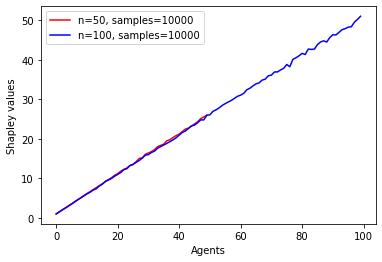

In [246]:
import matplotlib.pyplot as plt
import random


import random
import matplotlib.pyplot as plt

def approximate_shapley_values(n, num_samples):
    # Initialize a dictionary to store the sum of marginal contributions for each agent
    total_contributions = {i: 0 for i in range(1, n+1)}

    # Generate num_samples random subsets of the agents
    for _ in range(num_samples):
        S = random.sample(range(1, n+1), random.randint(1, n))
        for i in range(1, n+1):
            if i not in S:
                p = 1 / i  # probability of adding agent i to the coalition
                if random.random() < p:
                    S.append(i)
            total_contributions[i] += marginal_contribution(S, i)

    # Compute the approximate Shapley values by averaging the marginal contributions
    approximate_shapley_values = {i: total_contributions[i] / num_samples for i in range(1, n+1)}

    return approximate_shapley_values

# Compute and plot approximate Shapley values for 50 agents
approximate_shapley_values_50 = approximate_shapley_values(50, 10000)
plt.plot(approximate_shapley_values_50.values(), color='red', label=f"n=50, samples=10000")

# Compute and plot approximate Shapley values for 100 agents
approximate_shapley_values_100 = approximate_shapley_values(100, 10000)
plt.plot(approximate_shapley_values_100.values(), color='blue', label=f"n=100, samples=10000")

plt.xlabel('Agents')
plt.ylabel('Shapley values')
plt.legend()
plt.show()


Answer 1.2 

The approximate Shapley values at n=50 and n=100 represent the importance of each agent in determining the final cost of the taxi fare. They are calculated by considering the marginal contribution of the agent to the total cost for a large number of randomly generated coalitions of agents, and averaging these contributions. The potential issue with the Monte Carlo method is that it relies on randomly generating coalitions of agents. This in turn, can influence the accuracy of the given distribution of coalitions in the problem. As a solution to this issue, a more structured distribution of coalitions represented via the probability of adding agent i to the coalition was intigrated in the method (see code above for given problem).


Discussion of the effectiveness of the Monte Carlo Method:

The accuracy of the approximate Shapley values will depend on the value of num_samples. The larger the 'num_samples', the more accurate the approximation will be. However, when increasing the value of 'num_samples', the  computational cost of the function rises.  The effectiveness of the Monte Carlo sampling method can be investigated by running multiple sets of sufficiently large values of 'num_samples' and through comparing these generated results.

#2 Monte Carlo Tree Search (MCTS) (25%)


Construct binary tree Construct a binary tree of depth d = 20 (or more – if you’re feeling
lucky). Since the tree is binary, there are two branches (aka. edges, directions, decisions, etc)
emanating from each node, each branch (call them L(eft) and R(ight)) pointing to a unique child
node (except, of course, for the leaf nodes – see Fig 1). We can therefore assign to each node a
unique “address” (A) that captures the route down the tree to reach that node (e.g. A = LLRL
– for an example, again see Fig 1). Finally, pick a random leaf-node as your target node and let’s
denote its address as At.

Assign values to leaf-nodes 

Next, assign to each of the 2d leaf-nodes a value as follows:

• For every leaf-node i compute the edit-distance between its address Ai and the address
At of the target leaf, i.e. di := d(Ai,At).

• Recall that the edit-distance counts the number of positions at which two strings differ,

e.g.:
d(LRLR,LRRR) = 1, d(LRRL,LLLL) = 2, d(RRLL,RLRR) = 3

• Finally, define the value xi of leaf-node i to be a decreasing function of the distance 

di = d(Ai,At) to the target node, and sprinkle a bit of noise for good measure:
 e.g. xi = Be−di/τ + εi
 
where B and τ are chosen such that most nodes have a non-negligible value (e.g. B = 10
and τ = dmax/5 and εi ∼ N(0, 1) ).





Question 2.1

Implement the MCTS algorithm and apply it to the above tree to search for the optimal
(i.e. highest) value.

Assume that the number MCTS-iterations starting in a specific root node is limited (e.g. to 10
or 50). Make a similar assumption for the number of roll-outs starting in a particular (”snowcap”)
leaf node (e.g. 1 or 5).


Answer 2.1

To apply the MCTS algorithm to the binary tree and search for the optimal value, we can instantiate an MCTS object with the desired parameters, and call the search method with the desired number of iterations. The search method can then use the Node class to implement the four steps of the MCTS algorithm and return the optimal value.

To solve the given problem, the first step is to implement a binary tree of depth = 20. Then the MCTS steps as disccused in the report are applied. 

{1. Selection}
Selection of the child node with the highest UCT value for the current node. 

{2. Expansion}
Expansion of nodes in the current tree, resulting in sub-nodes (children). Randomly select one node. 

{3. Simulation}
Choose a random direction (L or R ) until the terminal node is reached. Perform random roll-out to leaf nodes starting at specific 'snowcap'.

{4. Back-propagation}
After reaching a leaf node, update all the values and visits obtained in the selection and expansion step to total value and increase visits by 1 unit. 

See implemted code below: 

In [ ]:
# pseudo-coode 
#def run(node, num_rollout):
#    "one iteration of select->expand->simulation-> backup"
#    path = select(node)
 #   leaf = path[-1]
  #  expand(leaf)
  #  reward = 0
  #  for i in range(num_rollout):
 #       reward += simulate(leaf)
#    backup(path, reward)

In [6]:
#use python library to import the search tree 
import tree_search as ts
import importlib
importlib.reload(ts)

#Set binary tree to depth = 20 and use B = 25 as stated in the problem 
depth = 20
c = 2.0
mc = ts.MCTS(depth, c=c, B=25, draw=False, save=False)
target_value = mc.tree.nodes[mc.target_name]["value"]
print(f"Binary tree at depth={depth}, target_name = (node) {mc.target_name} (with value {target_value:.3f})")

# After setting the MCTS class in ts.MCTS, execute MCTS 
tra = mc.run()

value = mc.tree.nodes[tra[-1]]["value"]
dist = ts.MCTS.edit_distance(
    mc.tree.nodes[tra[-1]]["address"], mc.tree.nodes[mc.target_name]["address"]
)
print(f"\noptimal trajectory =\n{mc.get_path(mc.target_name)}")
print(f"\nreturned trajectory =\n{tra}")
print(
    f"\nvalue of terminal node in trajectory: {value:.2f} ({100 * value/target_value:.2f}% of target_value {target_value:.2f}), distance = {dist}"
)

Binary tree at depth=20, target_name = (node) 788459 (with value 25.435)

optimal trajectory =
[1, 3, 6, 12, 24, 48, 96, 192, 384, 769, 1539, 3079, 6159, 12319, 24639, 49278, 98557, 197114, 394229, 788459]

returned trajectory =
[1, 3, 6, 13, 27, 54, 108, 216, 433, 867, 1735, 3470, 6941, 13883, 27767, 55535, 111071, 222142, 444285, 888571]

value of terminal node in trajectory: 6.23 (24.48% of target_value 25.43), distance = 5


Answer 2.1

The returning values above show that the terminal node at d= 20 is at value 6.23


Question 2.2

Collect statistics on the performance and discuss the role of the hyperparameter c in the
UCB-score.



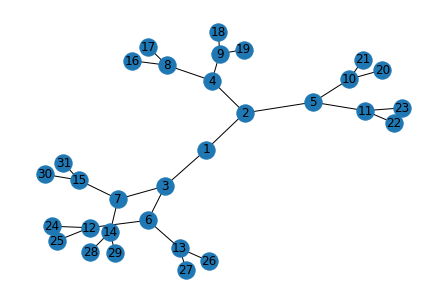

<Figure size 432x288 with 0 Axes>

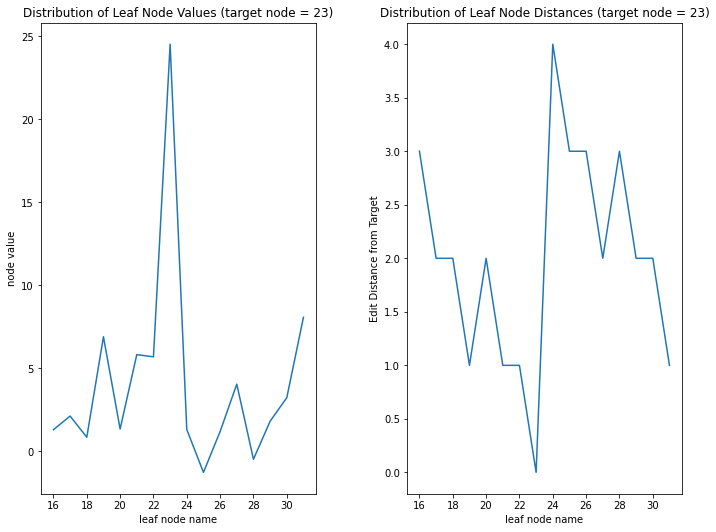

testing with c = 0.0
testing with c = 1.1111111111111112
testing with c = 2.2222222222222223
testing with c = 3.3333333333333335
testing with c = 4.444444444444445
testing with c = 5.555555555555555
testing with c = 6.666666666666667
testing with c = 7.777777777777779
testing with c = 8.88888888888889
testing with c = 10.0


<Figure size 432x288 with 0 Axes>

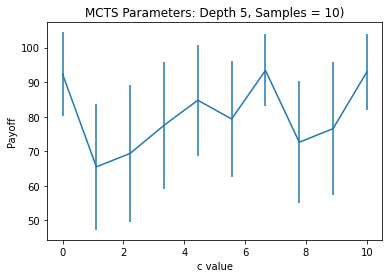

In [11]:
import math
from collections import defaultdict
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import statistics
import importlib
import tree_search as ts
importlib.reload(ts)
MCTS = ts.MCTS

#Leaf node comp: B = 25 stated in given problem 

depth = 5   
B = 25     
c = 2       

mc = MCTS(depth, c=c, B=B, draw=True)

def make_graph(data, show=True, save=False, samples=None):
  plt.clf()
  fig, ax = plt.subplots(1, 1)
  ax.set_xlabel("c value")
  ax.set_ylabel("Payoff")
  ax.set_title(
      f"MCTS Parameters: Depth {depth}, Samples = {samples})"
  )
  ax.errorbar(data.keys(), [sum(d)/len(d) for d in data.values()], yerr=[statistics.stdev(d)/2 for d in data.values()])
  #ax.errorbar(data.keys(), [sum(d)/len(d) for d in data.values()], yerr=[50 for d in data.values()])
  if save:
    plt.savefig("c_graphs.pdf", dpi=400)
  if show:
    plt.show()


data = defaultdict(list)
depth = 5
NUM_SAMPLES = 10
iter = 0
for c in np.linspace(0, 10, num=10):
  if iter % 4 == 0:
    print(f"testing with c = {c}")

  
  for _ in range(NUM_SAMPLES):
    mc = MCTS(depth, c=c, B=B, draw=False)
    tra = mc.run()
    value = mc.tree.nodes[tra[-1]]["value"]
    target_value = mc.tree.nodes[mc.target_name]["value"]
    data[c].append(100 * value / target_value)
make_graph(data, samples=NUM_SAMPLES, show=True, save=True)

Answer 2.2

The above figure shows the standard deviation as the vertical lines at each c interval. Based on the above analysis, low c values between 0 and 2 and high c values between 8 and 10 do not have a significant effect on performance and can be eliminated. At c = 2, the slope starts to increase until reaching a c value of 8. Thus, c values ranging between 2 and 8 at the set parameters (depth = 5 and sample = 10, ), show a positive effect on the value of payoffs. This shows that changing the c parameter does indeed affect the MCTS performance. For the future, more experiments can be conducted that take into account different depth values, c values and sample sizes

#3 Reinforcement Learning: SARSA and Q-Learning for Gridworld
(50%)

Consider the 9 × 9 gridworld example depicted in the figure 2 below. The blue gridcells represent
walls that cannot be traversed. The green cell represent a treasure and transition to this cell
yields a reward of +50 whereupon the episode is terminated (i.e. absorbing state). The red cell
represents the snakepit: this state is also absorbing and entering it yields a negative reward of −50.
All other cells represent regular states that are accessible to the agent. In each cell, the agent
can take four actions: move north, east, south or wes (not moving is NOT a valid action). These
actions result in a deterministic transition to the corresponding neighbouring cell. An action that
makes the agent bump into a wall or the grid-borders, leaves its state unchanged. All non-terminal
transitions (including running into walls or grid borders) incur a negative reward (”cost”) of −1.
For the questions below, we assume that the agent is not aware of all the above information
and needs to discover it by interacting with the environment (i.e. model-free setting).

Questions Perform, compare and comment on, the following experiments:

Question 3.1

Use SARSA in combination with greedification to search for an optimal policy.


First step: Implement e-greedy into SARSA. 

initial Q table:


,s,a,r,q
0,"(0, 0)",2.0,-1.0,-0.019326
1,"(0, 0)",1.0,-1.0,0.113766
2,"(0, 0)",0.0,-1.0,0.005360
3,"(0, 0)",3.0,-1.0,-0.048448
4,"(0, 1)",2.0,-1.0,-0.000368
...,...,...,...,...
319,"(8, 7)",3.0,-1.0,-0.073146
320,"(8, 8)",2.0,50.0,0.000000
321,"(8, 8)",1.0,50.0,0.000000
322,"(8, 8)",0.0,-1.0,0.010213


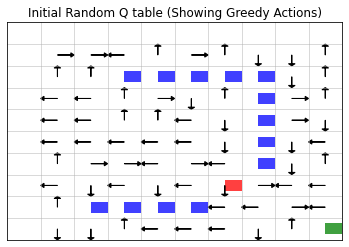

Q table (post learning):


,s,a,r,q
0,"(0, 0)",2.0,-1.0,-2.879003
1,"(0, 0)",1.0,-1.0,-2.976390
2,"(0, 0)",0.0,-1.0,-2.979617
3,"(0, 0)",3.0,-1.0,-2.971403
4,"(0, 1)",2.0,-1.0,-2.919224
...,...,...,...,...
319,"(8, 7)",3.0,-1.0,-0.073146
320,"(8, 8)",2.0,50.0,0.000000
321,"(8, 8)",1.0,50.0,0.000000
322,"(8, 8)",0.0,-1.0,0.010213


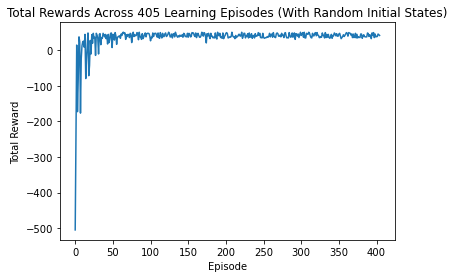

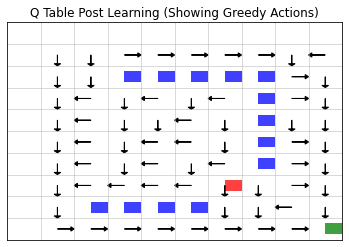

In [12]:
import importlib
import qlearn as ql
importlib.reload(ql)
# Implement e-greedy into SARSA
sim = ql.direct_updates(sarsa=True, epsilon=0.0, iterations=405, display=display)

Answer 3.1

The SARSA algorithm using greedification with a random initial was run to search for an optimal policy and optimal state values. SARSA was performed on the given 9 x 9 Gridworld. A total of 405 number of episodes were run using the greedification method. Graphs showing the the optimal policy and state values were generated at episode = 405 (Fig.6, Fig.7). 

Figure 6 represents the Q tables generated with SARSA using the e-greedy method and figure 7 shows the total rewards across all 405 learning episodes. Figure 7 shows that the convergence of rewards start at roughly 75 number of episodes. 

Question 3.2 

Use Q-learning to search for an optimal policy. Implement two different update strategies:

(a) Direct updates: Update the Q-table while rolling out each sample path;

(b) Replay buffer: Collect the experiences (s, a, r, s′) in a replay buffer and sample from
this buffer.


Compare the solutions and the corresponding computational effort for the three solution
strategies.

Run SARSA and Q-learning with 1. direct updates and 2. replay buffer

Q table (post learning):


,s,a,r,q
0,"(0, 0)",2.0,-1.0,-2.878863
1,"(0, 0)",1.0,-1.0,-2.951716
2,"(0, 0)",0.0,-1.0,-2.959249
3,"(0, 0)",3.0,-1.0,-2.923182
4,"(0, 1)",2.0,-1.0,-2.919246
...,...,...,...,...
319,"(8, 7)",3.0,-1.0,20.575582
320,"(8, 8)",2.0,50.0,0.000000
321,"(8, 8)",1.0,50.0,0.000000
322,"(8, 8)",0.0,-1.0,0.013038


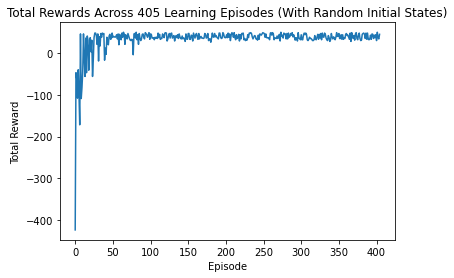

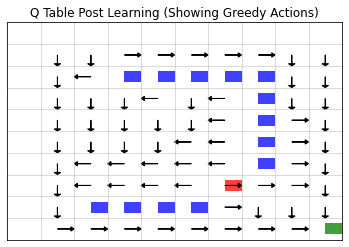

In [13]:
import importlib
import qlearn as ql
importlib.reload(ql)
sim = ql.direct_updates(iterations=405, display=display, show_initial=False)

--> code replay buffer Q-learning and make the graphs 

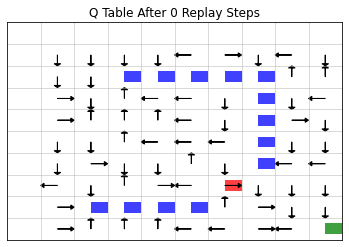

collected 5000 experiences to sample from.


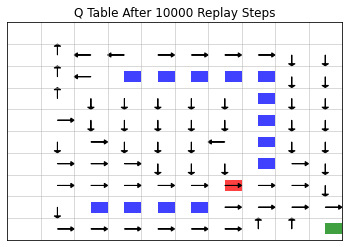

In [14]:
import importlib
import qlearn as ql
importlib.reload(ql)
ql.strategy2b()


Comparing results of the 3 solutions via graph plots